In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4
from scipy import stats
import numpy as np

In [7]:
df = pd.read_csv(r'C:\Users\gabri\OneDrive\Documentos\Data Science Projects with Python\Chapter_1_cleaned_data.csv')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, \
                                                        random_state=24)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [13]:
np.mean(y_train)

0.223102526838873

In [14]:
np.mean(y_test)

0.21657603600225014

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
activity_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, \
                                    multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                    verbose=0, warm_start=False)

In [18]:
activity_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [20]:
y_pred = activity_lr.predict(X_test)

In [21]:
activity_lr.score(X_test, y_test)

0.7834239639977498

In [22]:
from sklearn import metrics

In [23]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [25]:
y_pred_proba = activity_lr.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [26]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

Text(0, 0.5, 'Number of samples')

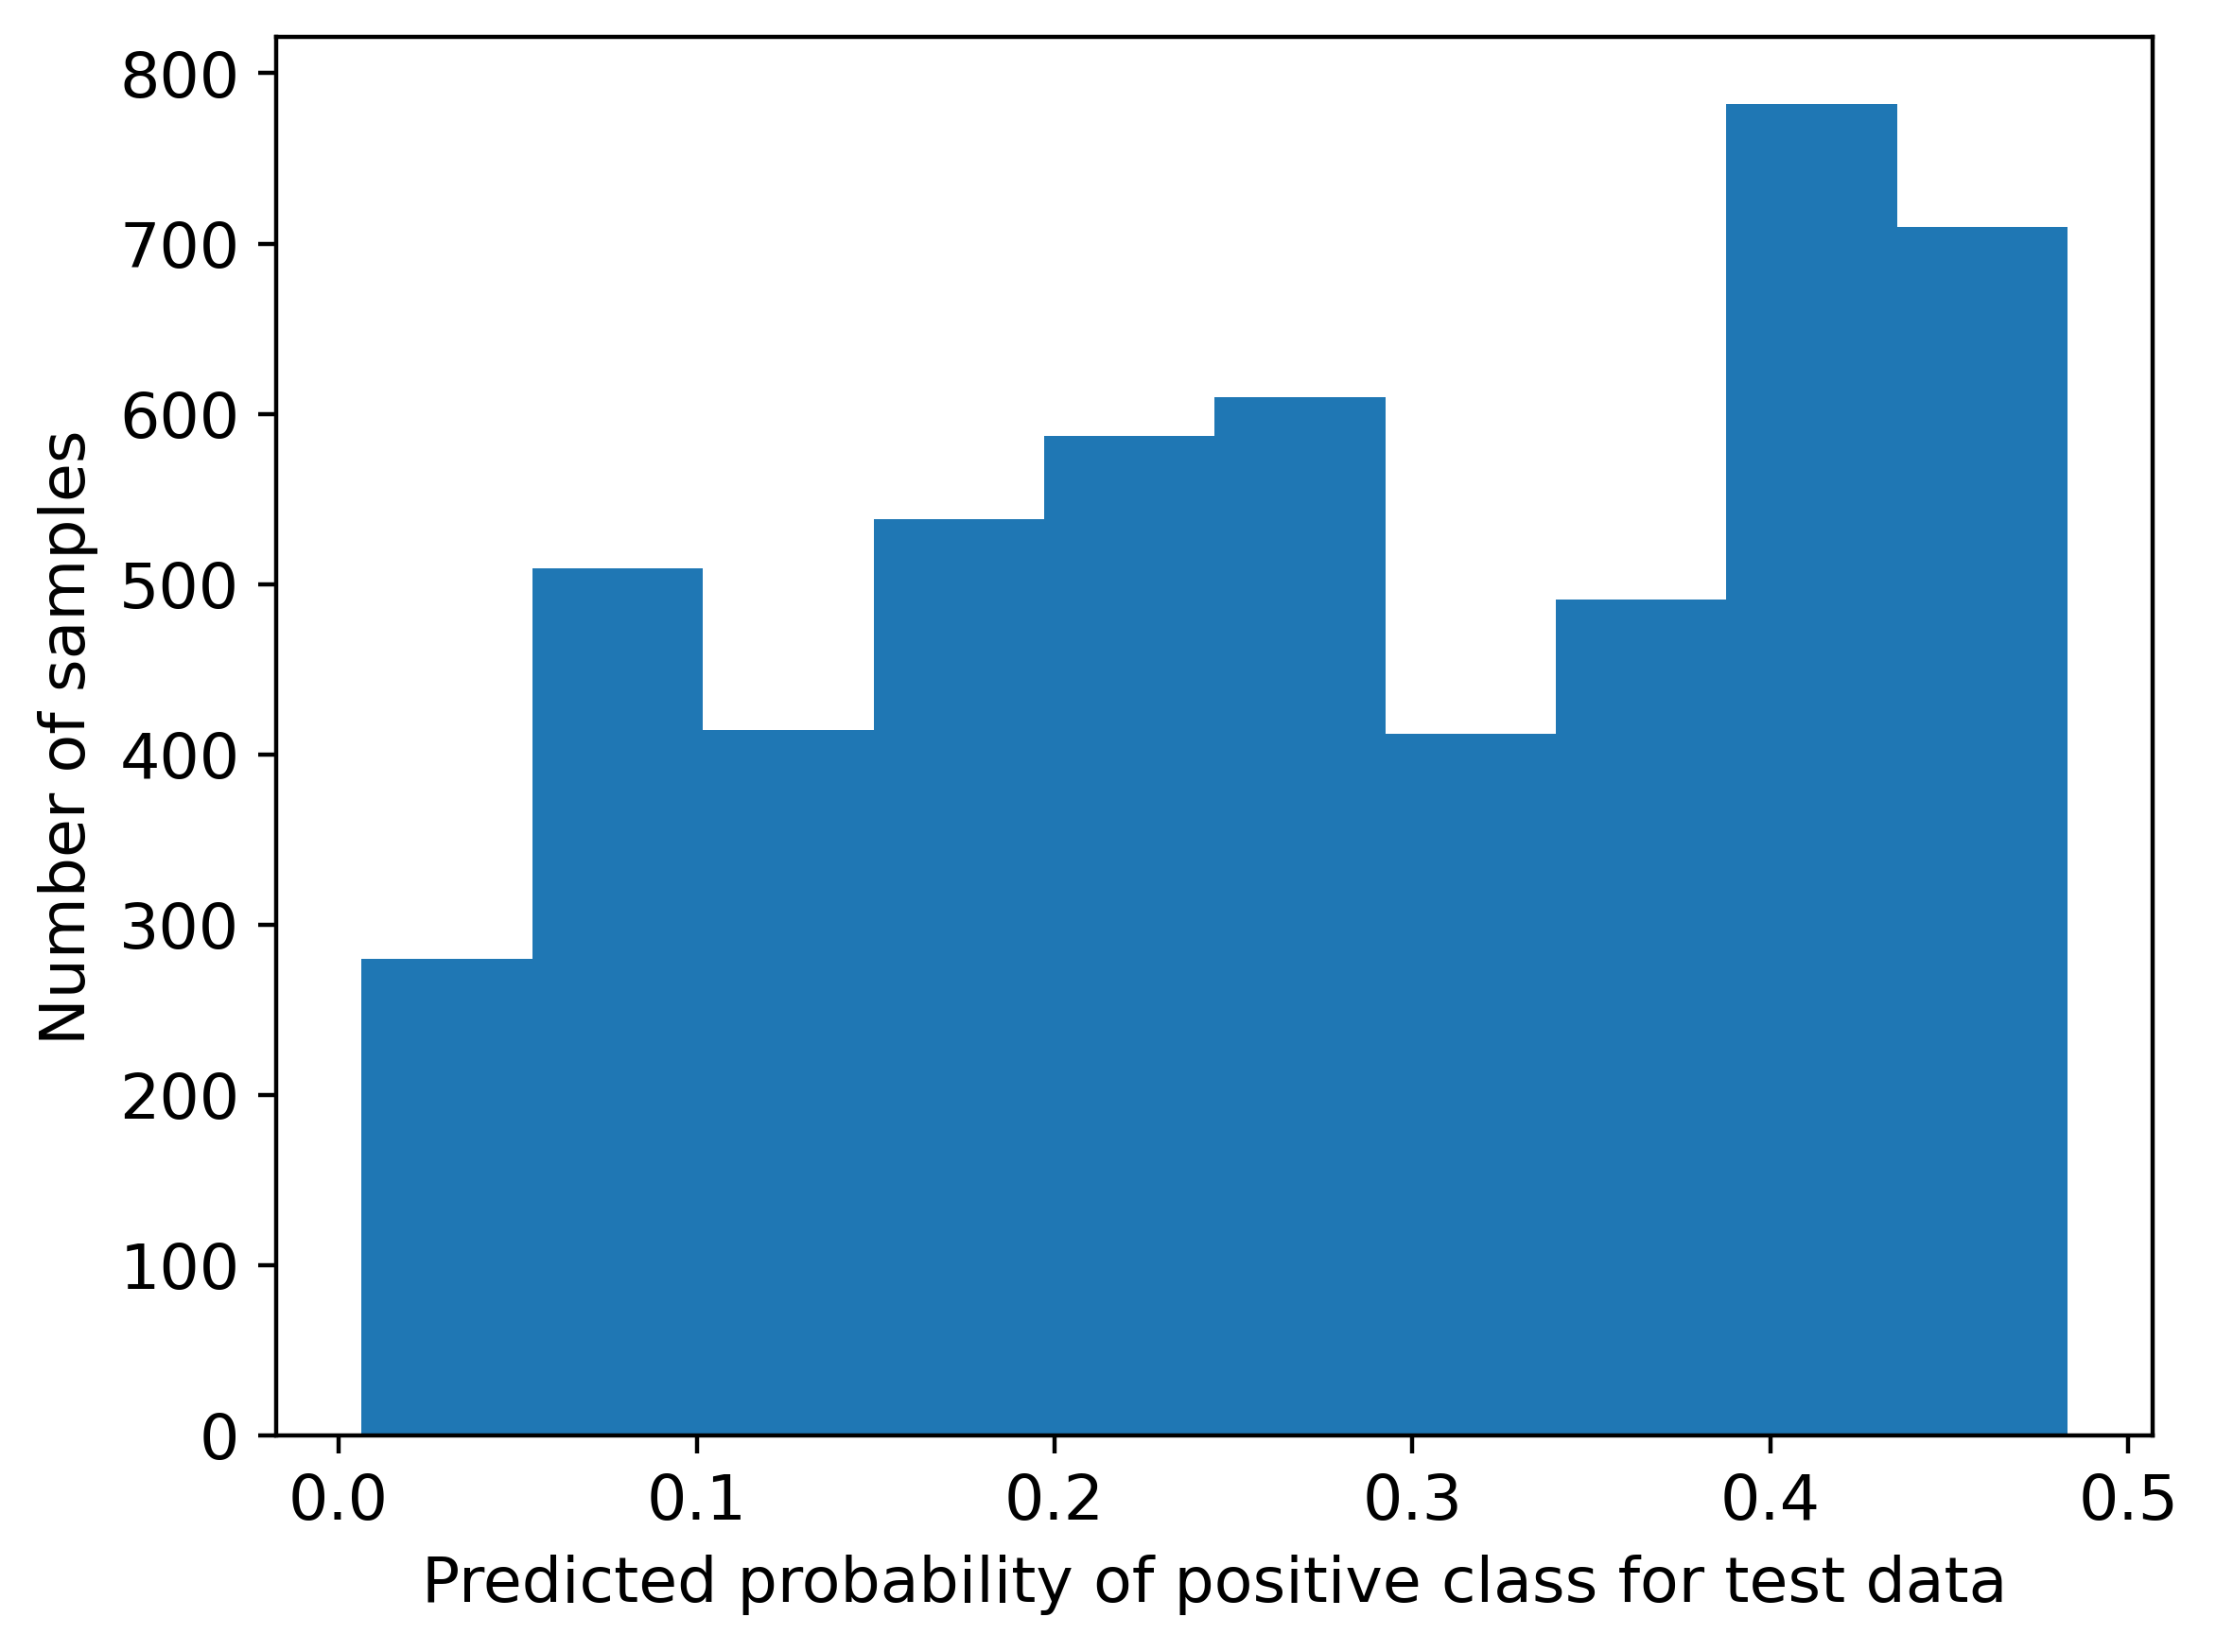

In [29]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for test data')
plt.ylabel('Number of samples')

In [31]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

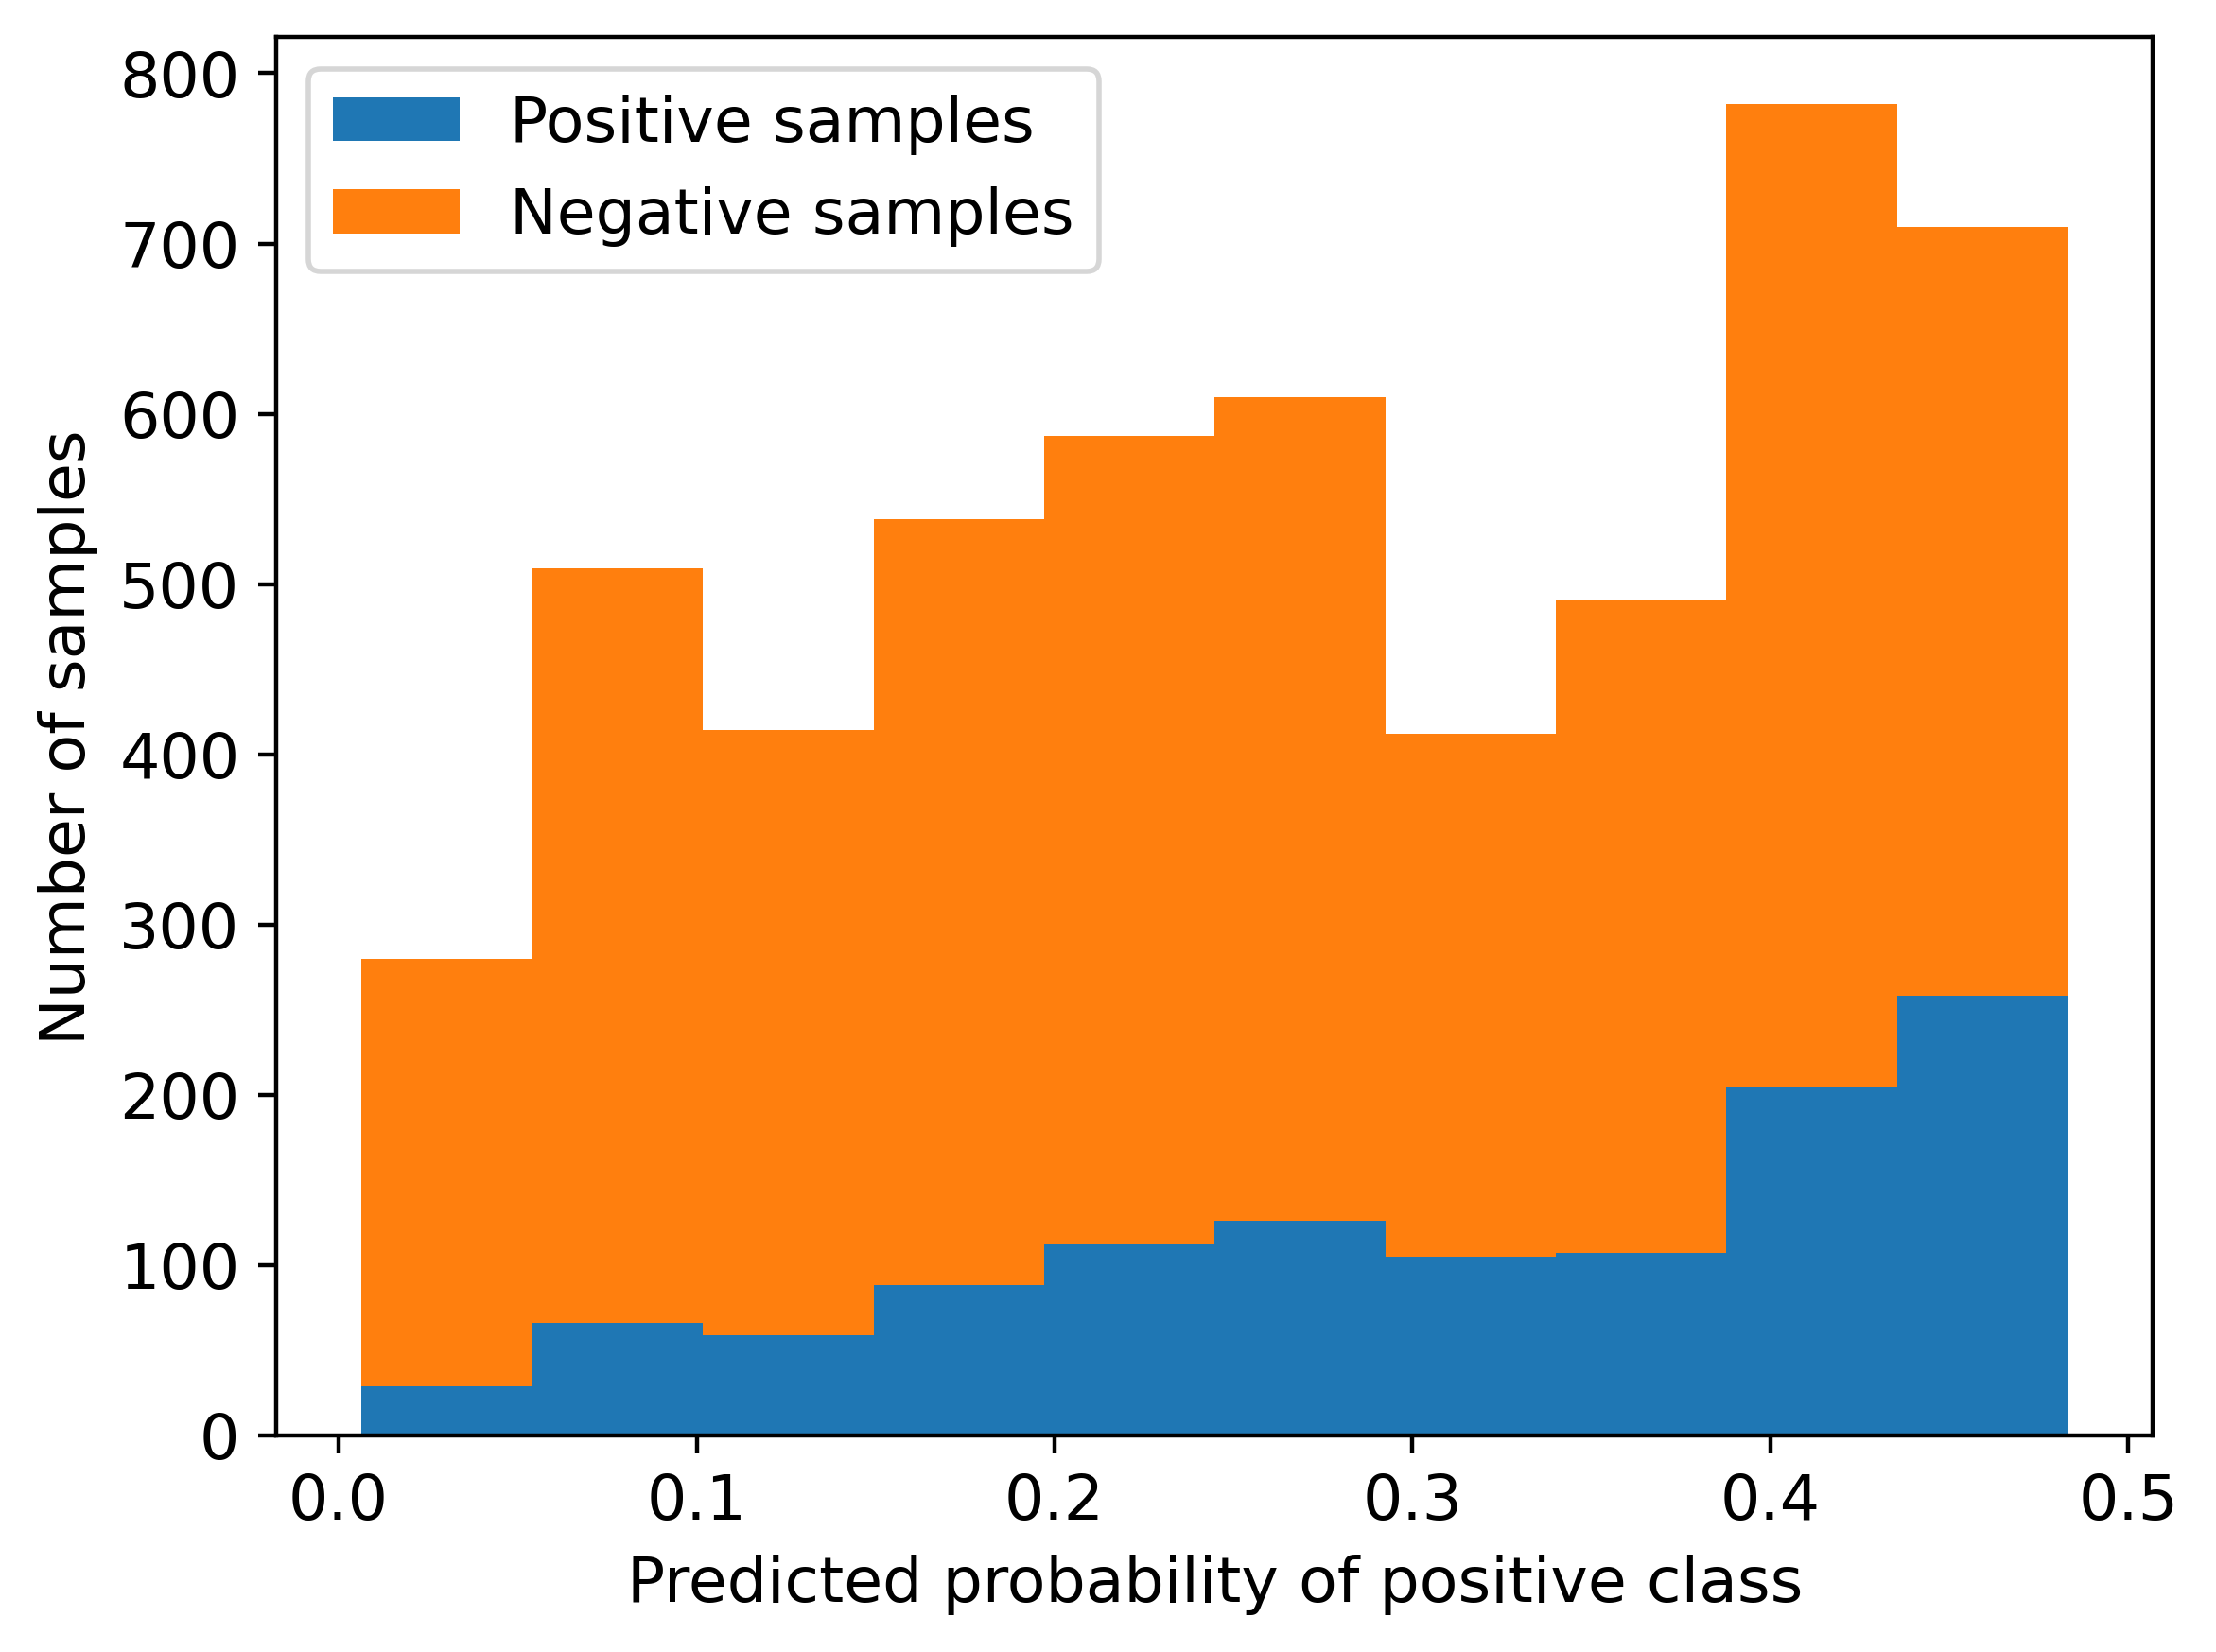

In [32]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [34]:
metrics.roc_auc_score(y_test, pos_proba)
# ROC AUC from EDUCATION feature is 0.5434650477972642

0.6201990844642832

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC Curve')

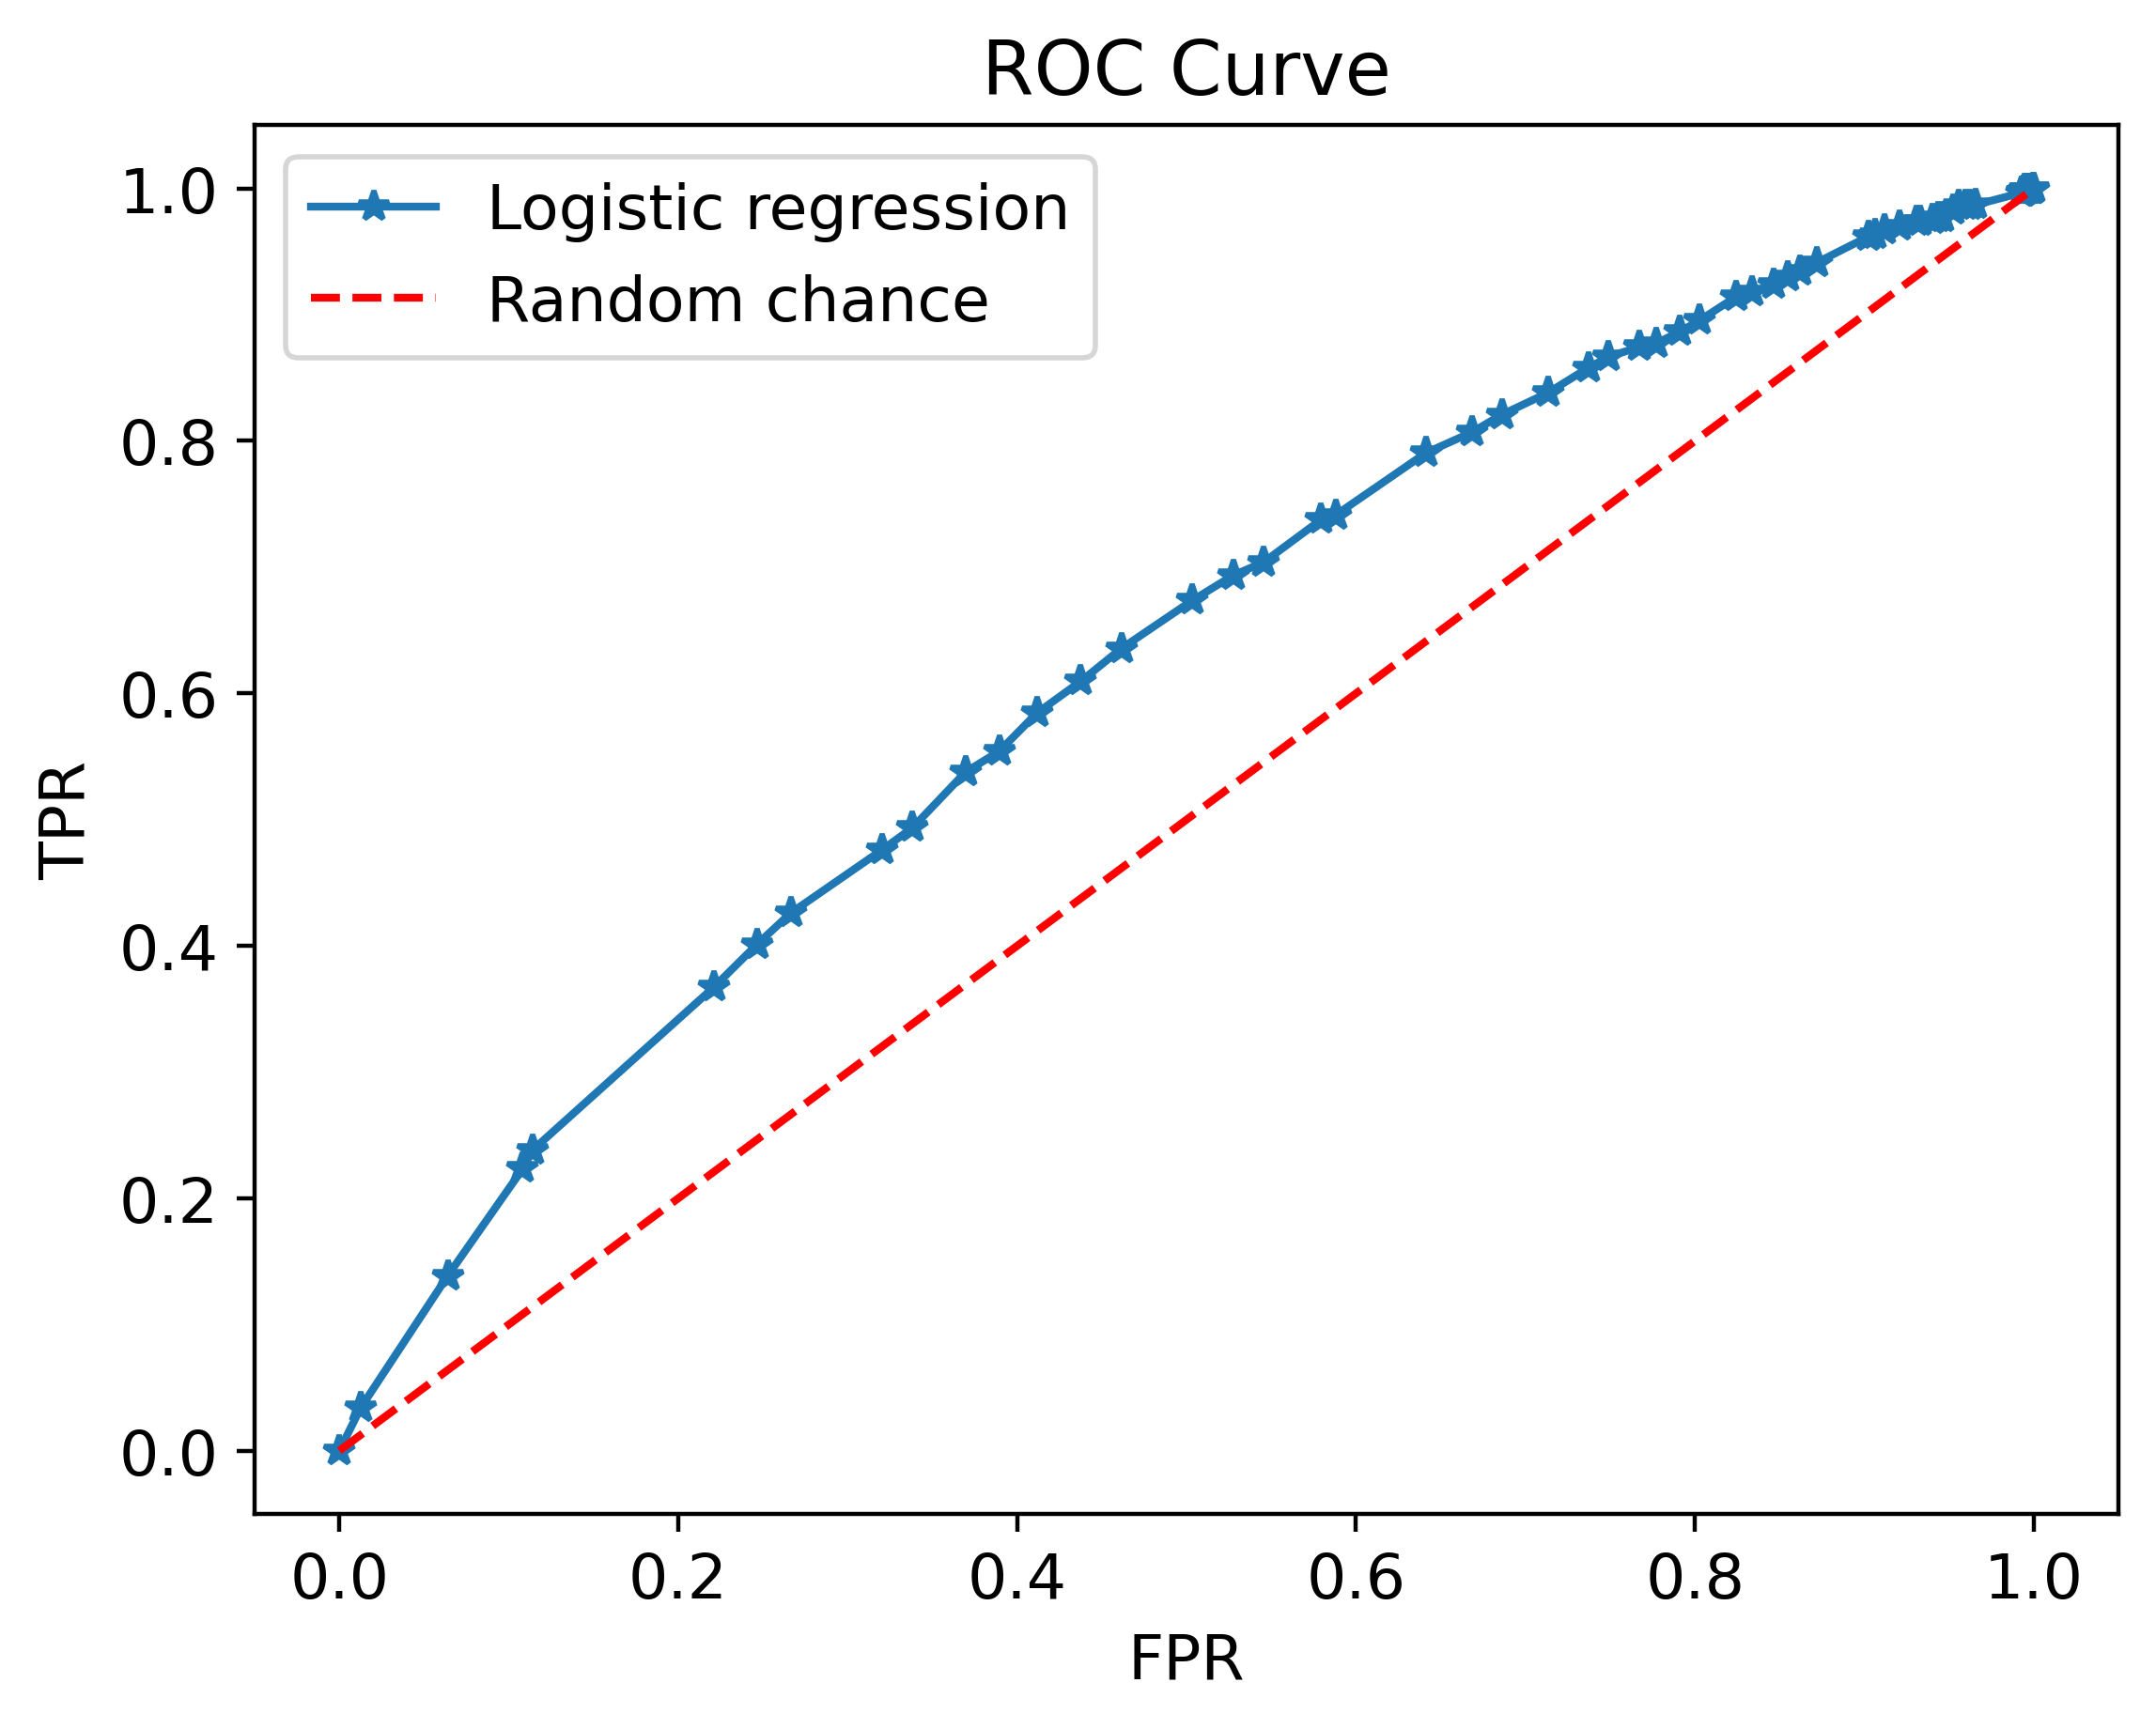

In [37]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [38]:
thresholds

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

In [57]:
precision, recall, thresholds_pr = metrics.precision_recall_curve(y_test, pos_proba)

Text(0.5, 1.0, 'Precision Recall Curve')

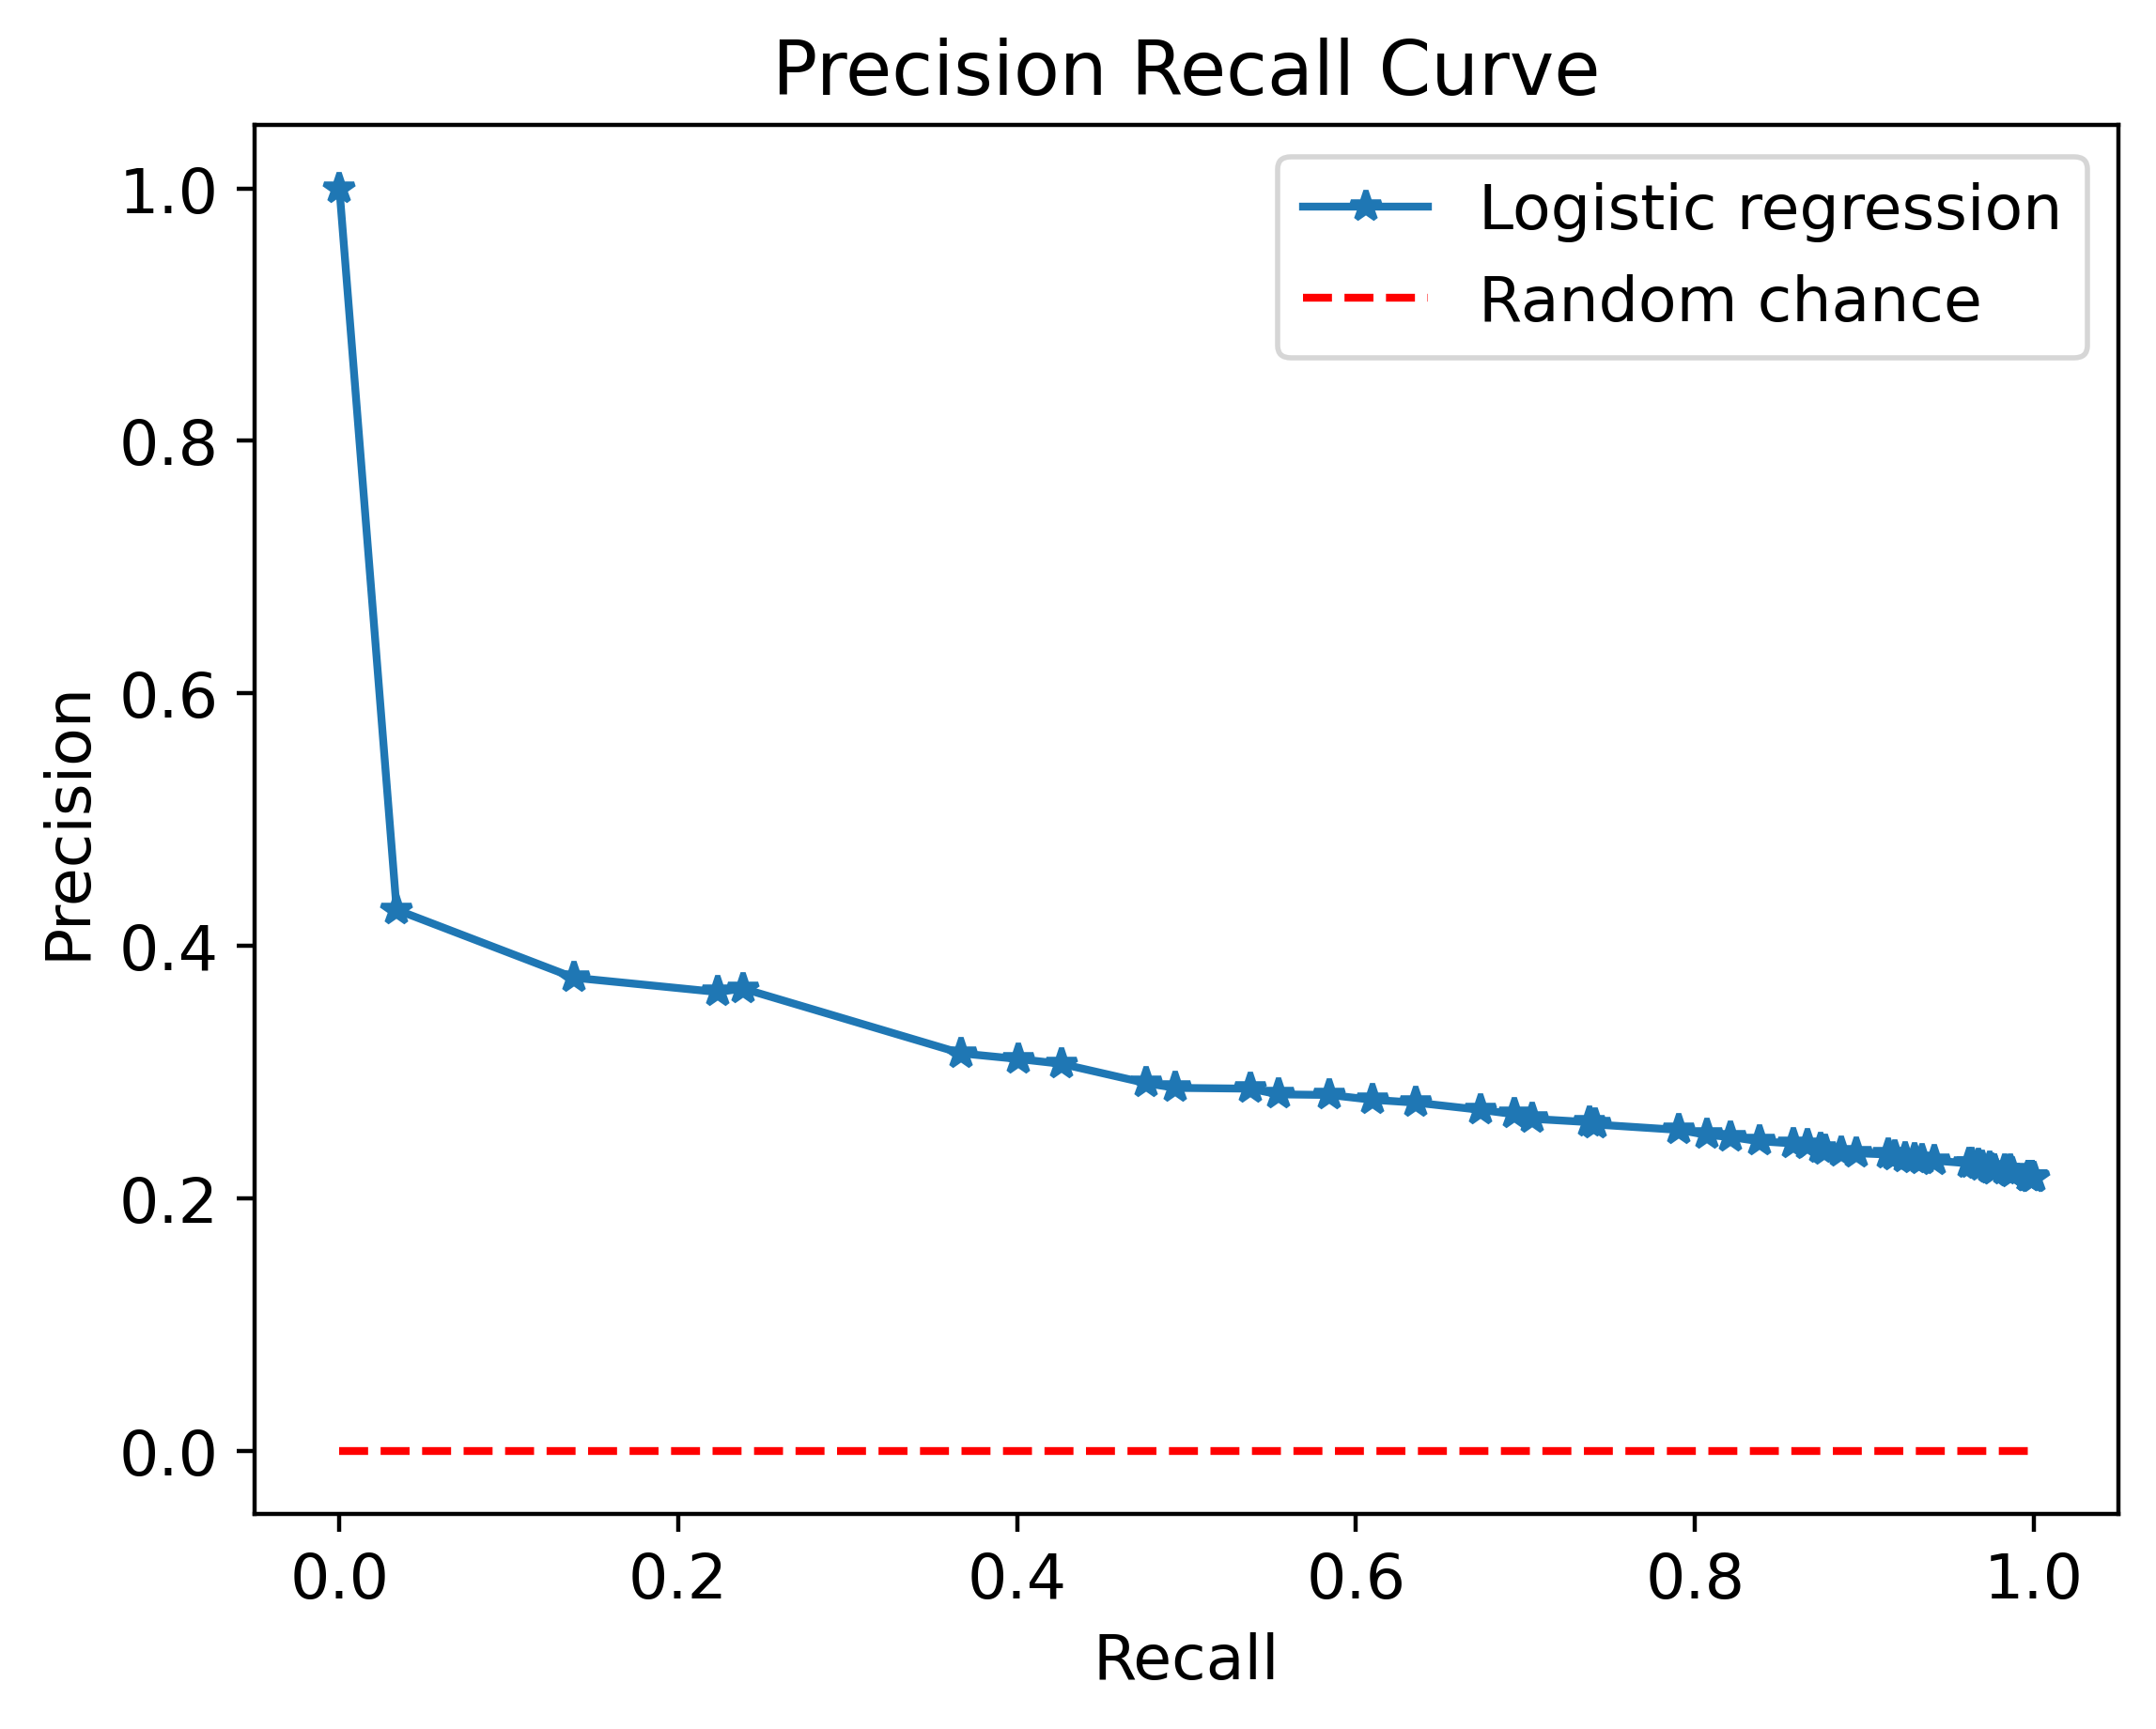

In [58]:
plt.plot(recall, precision, '*-')
plt.plot([0,1], [0,0], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [48]:
thresholds

array([0.0078901 , 0.00844134, 0.01033455, 0.01264696, 0.01446524,
       0.01546869, 0.01654057, 0.01890793, 0.02021324, 0.02160667,
       0.0230939 , 0.02468092, 0.02637405, 0.02817998, 0.03010574,
       0.03215875, 0.0343468 , 0.03667808, 0.03916119, 0.0418051 ,
       0.04461922, 0.04761337, 0.05079775, 0.05418298, 0.05778008,
       0.06160044, 0.06565578, 0.0699582 , 0.07452008, 0.07935404,
       0.08447295, 0.08988983, 0.09561779, 0.10166997, 0.10805946,
       0.11479918, 0.12190182, 0.12937966, 0.13724452, 0.14550758,
       0.15417922, 0.16326891, 0.17278502, 0.18273464, 0.19312344,
       0.20395547, 0.21523299, 0.2269563 , 0.23912359, 0.25173076,
       0.26477132, 0.27823623, 0.29211383, 0.30638978, 0.321047  ,
       0.33606566, 0.35142324, 0.3670946 , 0.38305207, 0.3992656 ,
       0.415703  , 0.4323301 , 0.44911106, 0.46600867, 0.48298465])

In [49]:
metrics.average_precision_score(y_test, pos_proba)

0.29824891448211244

In [51]:
from sklearn.metrics import average_precision_score, precision_recall_curve

In [52]:
auc_pr = average_precision_score(y_test, pos_proba)
auc_pr

0.29824891448211244

In [59]:
metrics.auc(recall, precision)

0.31566964427378624

In [54]:
y_pred_proba_train = activity_lr.predict_proba(X_train)
y_pred_proba_train

array([[0.69361022, 0.30638978],
       [0.78476701, 0.21523299],
       [0.94581702, 0.05418298],
       ...,
       [0.55088894, 0.44911106],
       [0.73522868, 0.26477132],
       [0.92064596, 0.07935404]])

In [55]:
pos_proba_train = y_pred_proba_train[:,1]
pos_proba_train

array([0.30638978, 0.21523299, 0.05418298, ..., 0.44911106, 0.26477132,
       0.07935404])

In [56]:
metrics.roc_auc_score(y_train, pos_proba_train)

0.6182918113358344